In [451]:
import pandas as pd
# Libraries

import numpy as np
import pandas as pd
pd.set_option('max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')
import datetime
from scipy import stats
from scipy.sparse import hstack, csr_matrix
from sklearn.model_selection import train_test_split, KFold
from wordcloud import WordCloud
from collections import Counter
from nltk.corpus import stopwords
from nltk.util import ngrams
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import StandardScaler
stop = set(stopwords.words('english'))
import os
import xgboost as xgb
from sklearn import model_selection
from sklearn.metrics import accuracy_score
import json
import ast
from urllib.request import urlopen
from PIL import Image
from sklearn.preprocessing import LabelEncoder
import time
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

In [452]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor

In [453]:
df = pd.read_csv("train.csv")

In [454]:
temp_df = df.copy()

In [455]:
temp_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [456]:
temp_df.shape

(1460, 81)

In [457]:
temp_df.isna().sum() / temp_df.shape[0] >0.3

Id               False
MSSubClass       False
MSZoning         False
LotFrontage      False
LotArea          False
                 ...  
MoSold           False
YrSold           False
SaleType         False
SaleCondition    False
SalePrice        False
Length: 81, dtype: bool

In [458]:
temp_df = temp_df.drop(columns='Id', axis=1)

In [459]:
temp_df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,

In [460]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [461]:
# Some of the columns have 'NA' as a category of the values
# Categorial Column with na 

col_with_NA_as_category = ['Alley','BsmtQual','BsmtCond', 'BsmtExposure', 'BsmtFinType1',
                           'BsmtFinType2','FireplaceQu', 'GarageType', 'GarageFinish',
                           'GarageQual','GarageCond','PoolQC','Fence', 'MiscFeature']
# Completly 14-Column 

In [462]:
null = temp_df.isna().sum()

In [463]:
null = null[null.values>0]
null

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [464]:
null.sort_values(ascending=False)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

In [465]:
null_columns = [i for i in null.index if i not in col_with_NA_as_category ]
null_columns # Column contain null put this null is not a static Value 

['LotFrontage', 'MasVnrType', 'MasVnrArea', 'Electrical', 'GarageYrBlt']

In [466]:
# We can Simply Replace null values By Imputer, Is that a Good Idea ? 
temp_df['LotFrontage'] = pd.DataFrame(SimpleImputer(strategy='mean').fit_transform(df[['LotFrontage']]))
temp_df['MasVnrArea'] = pd.DataFrame(SimpleImputer(strategy='mean').fit_transform(df[['MasVnrArea']]))
temp_df['MasVnrType'] = pd.DataFrame(SimpleImputer(strategy='most_frequent').fit_transform(df[['MasVnrType']]))
temp_df['Electrical'] = pd.DataFrame(SimpleImputer(strategy='most_frequent').fit_transform(df[['Electrical']]))
temp_df['GarageYrBlt'] = pd.DataFrame(SimpleImputer(strategy='most_frequent').fit_transform(df[['GarageYrBlt']]))

In [467]:
temp_df['LotFrontage'].isna().sum()

0

In [468]:
for col in col_with_NA_as_category:
    temp_df[col] = temp_df[col].fillna('Not Applicable') # Fillna .. to fill it with any value

In [469]:
temp_df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Not Applicable,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Not Applicable,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Not Applicable,Not Applicable,Not Applicable,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Not Applicable,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Not Applicable,Not Applicable,Not Applicable,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,Not Applicable,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Not Applicable,Not Applicable,Not Applicable,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,Not Applicable,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Not Applicable,Not Applicable,Not Applicable,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,Not Applicable,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Not Applicable,Not Applicable,Not Applicable,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Not Applicable,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,Not Applicable,Not Applicable,Not Applicable,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,Not Applicable,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,Not Applicable,MnPrv,Not Applicable,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,Not Applicable,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9

In [470]:
temp_df.isnull().sum()[temp_df.isnull().sum().values>0] # Great no more null values in data set

Series([], dtype: int64)

In [471]:
# Categorial Column with numerical Values 
categorial_columns_with_numerical_values = ['MSSubClass','OverallQual','OverallCond','YearBuilt','BsmtFullBath',
                                            'BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd',
                                            'Fireplaces','GarageYrBlt','GarageCars','MoSold','YrSold']

In [472]:
for i in categorial_columns_with_numerical_values:
    temp_df[i] = temp_df[i].astype(str) 

In [473]:
# checking the corelation between the target variable and the other numerical columns
corr = temp_df.corr().sort_values(by='SalePrice', ascending=False)[['SalePrice']] # relation with output & order them descending
corr

,SalePrice
SalePrice,1.000000
GrLivArea,0.708624
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
YearRemodAdd,0.507101
MasVnrArea,0.475241
BsmtFinSF1,0.386420
LotFrontage,0.334901
WoodDeckSF,0.324413


In [474]:
col_to_be_removed = corr.index[7:]
col_to_be_removed
# 1 means that there is a 1 to 1 relationship (a perfect correlation)
# 0.9 is also a good relationship, and if you increase one value, the other will probably increase as well.

# -0.9 would be just as good relationship as 0.9, but if you increase one value, the other will probably go down
# 0.009403 correlation, which is a very bad correlation because there is no corroleation

# in general from 0.6 or -0.6 is Good correlation

Index(['BsmtFinSF1', 'LotFrontage', 'WoodDeckSF', '2ndFlrSF', 'OpenPorchSF',
       'LotArea', 'BsmtUnfSF', 'ScreenPorch', 'PoolArea', '3SsnPorch',
       'BsmtFinSF2', 'MiscVal', 'LowQualFinSF', 'EnclosedPorch'],
      dtype='object')

In [475]:
# column with low relation with output , can be Removed 
temp_df = temp_df.drop(col_to_be_removed, axis=1)

In [476]:
temp_df # Good now we have 66 Columns to start working On

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,Pave,Not Applicable,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,856,GasA,Ex,Y,SBrkr,856,1710,1,0,2,1,3,1,Gd,8,Typ,0,Not Applicable,Attchd,2003.0,RFn,2,548,TA,TA,Y,Not Applicable,Not Applicable,Not Applicable,2,2008,WD,Normal,208500
1,20,RL,Pave,Not Applicable,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,1262,GasA,Ex,Y,SBrkr,1262,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,Not Applicable,Not Applicable,Not Applicable,5,2007,WD,Normal,181500
2,60,RL,Pave,Not Applicable,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,920,GasA,Ex,Y,SBrkr,920,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,Not Applicable,Not Applicable,Not Applicable,9,2008,WD,Normal,223500
3,70,RL,Pave,Not Applicable,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,756,GasA,Gd,Y,SBrkr,961,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,Not Applicable,Not Applicable,Not Applicable,2,2006,WD,Abnorml,140000
4,60,RL,Pave,Not Applicable,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,1145,GasA,Ex,Y,SBrkr,1145,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,Not Applicable,Not Applicable,Not Applicable,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,Pave,Not Applicable,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,Unf,953,GasA,Ex,Y,SBrkr,953,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,Not Applicable,Not Applicable,Not Applicable,8,2007,WD,Normal,175000
1456,20,RL,Pave,Not Applicable,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,Rec,1542,GasA,TA,Y,SBrkr,2073,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,Not Applicable,MnPrv,Not Applicable,2,2010,WD,Normal,210000
1457,70,RL,Pave,Not Applicable,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,Unf,1152,GasA,Ex,Y,SBrkr,1188,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,Not Applicable,GdPrv,Shed,5,2010,WD,Normal,266500
1458,20,RL,Pave,Not Applicable,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,Rec,1078,GasA,Gd,Y,FuseA,1078,1078,1,0,1,0,2,1,Gd,5,Typ,0,Not Applicable,Attchd,1950.0,Unf,1,240,TA,TA,Y,Not Applicable,Not Applicable,Not Applicable,4,2010,WD,Normal,142125


In [477]:
corr.index[1:] # Correlation always Get between Numerical Columns Only

Index(['GrLivArea', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'LotFrontage', 'WoodDeckSF', '2ndFlrSF',
       'OpenPorchSF', 'LotArea', 'BsmtUnfSF', 'ScreenPorch', 'PoolArea',
       '3SsnPorch', 'BsmtFinSF2', 'MiscVal', 'LowQualFinSF', 'EnclosedPorch'],
      dtype='object')

In [478]:
temp_df.columns

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', '1stFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'MoSold',
       'YrSold', 'SaleType', 'SaleCondition', 'SalePrice'],
      dt

In [479]:
# Now Deviding columns as Categorial & Continous Columns 
numerical_columns = [i for i in corr.index[1:] if i not in col_to_be_removed]
categorical_columns = [i for i in temp_df.columns[:-1] if i not in numerical_columns ]

In [480]:
temp_df[numerical_columns]

,GrLivArea,GarageArea,TotalBsmtSF,1stFlrSF,YearRemodAdd,MasVnrArea
0,1710,548,856,856,2003,196.0
1,1262,460,1262,1262,1976,0.0
2,1786,608,920,920,2002,162.0
3,1717,642,756,961,1970,0.0
4,2198,836,1145,1145,2000,350.0
...,...,...,...,...,...,...
1455,1647,460,953,953,2000,0.0
1456,2073,500,1542,2073,1988,119.0
1457,2340,252,1152,1188,2006,0.0
1458,1078,240,1078,1078,1996,0.0


In [481]:
temp_df[categorical_columns]

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,Pave,Not Applicable,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,1,0,2,1,3,1,Gd,8,Typ,0,Not Applicable,Attchd,2003.0,RFn,2,TA,TA,Y,Not Applicable,Not Applicable,Not Applicable,2,2008,WD,Normal
1,20,RL,Pave,Not Applicable,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,TA,TA,Y,Not Applicable,Not Applicable,Not Applicable,5,2007,WD,Normal
2,60,RL,Pave,Not Applicable,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,TA,TA,Y,Not Applicable,Not Applicable,Not Applicable,9,2008,WD,Normal
3,70,RL,Pave,Not Applicable,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,TA,TA,Y,Not Applicable,Not Applicable,Not Applicable,2,2006,WD,Abnorml
4,60,RL,Pave,Not Applicable,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,TA,TA,Y,Not Applicable,Not Applicable,Not Applicable,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,Pave,Not Applicable,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,TA,TA,Y,Not Applicable,Not Applicable,Not Applicable,8,2007,WD,Normal
1456,20,RL,Pave,Not Applicable,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,Gable,CompShg,Plywood,Plywood,Stone,TA,TA,CBlock,Gd,TA,No,ALQ,Rec,GasA,TA,Y,SBrkr,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,TA,TA,Y,Not Applicable,MnPrv,Not Applicable,2,2010,WD,Normal
1457,70,RL,Pave,Not Applicable,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,Gable,CompShg,CemntBd,CmentBd,None,Ex,Gd,Stone,TA,Gd,No,GLQ,Unf,GasA,Ex,Y,SBrkr,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,TA,TA,Y,Not Applicable,GdPrv,Shed,5,2010,WD,Normal
1458,20,RL,Pave,Not Applicable,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,Hip,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,TA,TA,Mn,GLQ,Rec,GasA,Gd,Y,FuseA,1,0,1,0,2,1,Gd,5,Typ,0,Not Applicable,Attchd,1950.0,Unf,1,TA,TA,Y,Not Applicable,Not Applicable,Not Applicable,4,2010,WD,Normal


In [482]:
print("No. of Categorical columns: ", len(categorical_columns))
print("No. of Numerical columns: ", len(numerical_columns))

No. of Categorical columns:  59
No. of Numerical columns:  6


In [483]:
# Dealing with Numerical columns

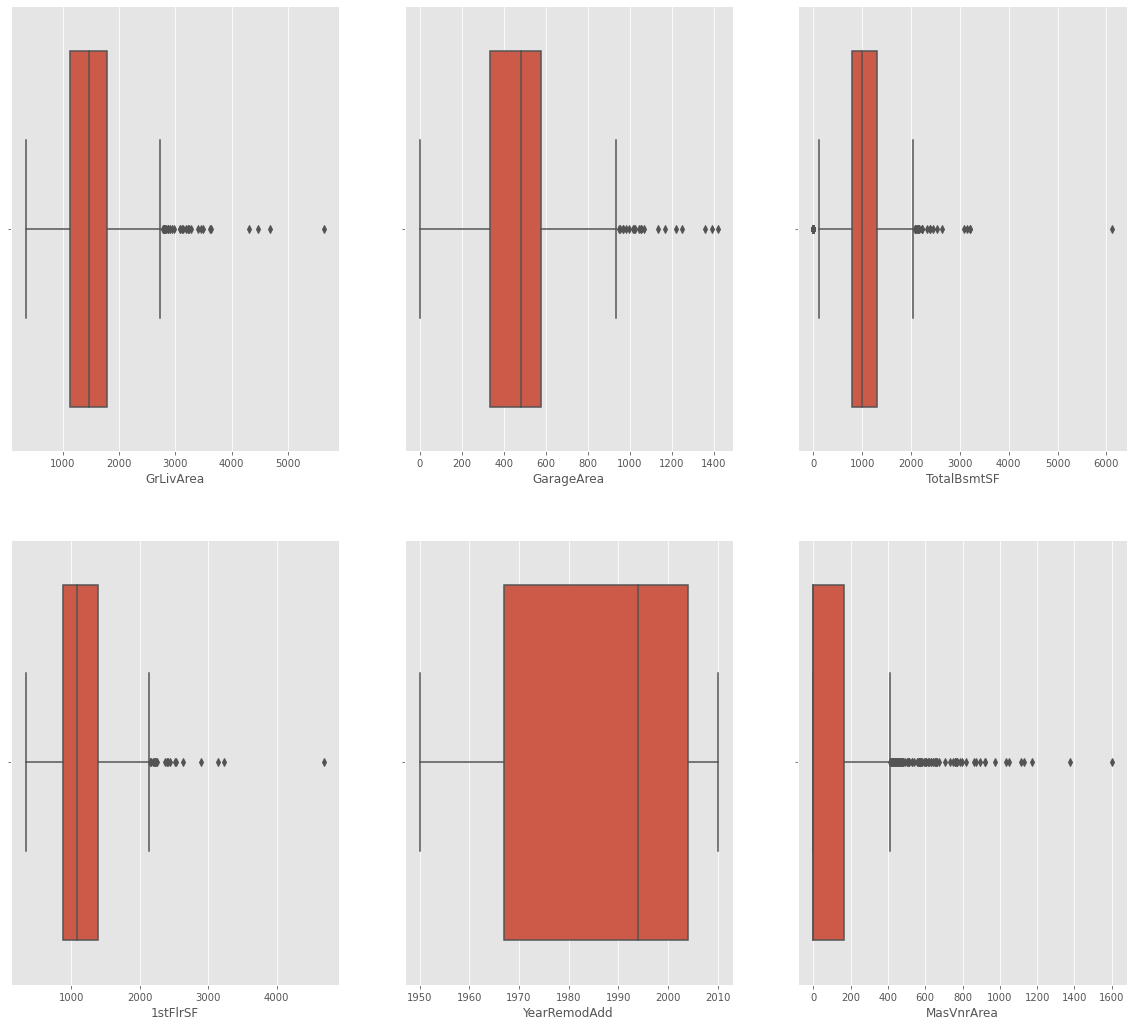

In [484]:
# Checking For outliers by Boxplot
k=1
plt.figure(figsize=(20,18))
for col in numerical_columns:
    plt.subplot(2,3,k) # 2*3 = 6 
    sns.boxplot(x=temp_df[col])
    k+=1
plt.show()

In [485]:
temp_df['TotalBsmtSF'].describe()

count    1460.000000
mean     1057.429452
std       438.705324
min         0.000000
25%       795.750000
50%       991.500000
75%      1298.250000
max      6110.000000
Name: TotalBsmtSF, dtype: float64

In [486]:
# function to remove outliers

def remove_outlier(column):
    #1st Q
    p25 = column.describe()[4]
    #3rd Q
    p75 = column.describe()[6]
    IQR = p75 - p25
    ul = p75 + 1.5*IQR
    ll = p25 - 1.5*IQR
    column.mask(column>ul,ul,inplace=True) # apply mask to this outlayer .. enable you from control boundries
    column.mask(column<ll,ll,inplace=True)

In [487]:
for col in numerical_columns :
    if col!='YearRemodAdd':
        remove_outlier(temp_df[col])

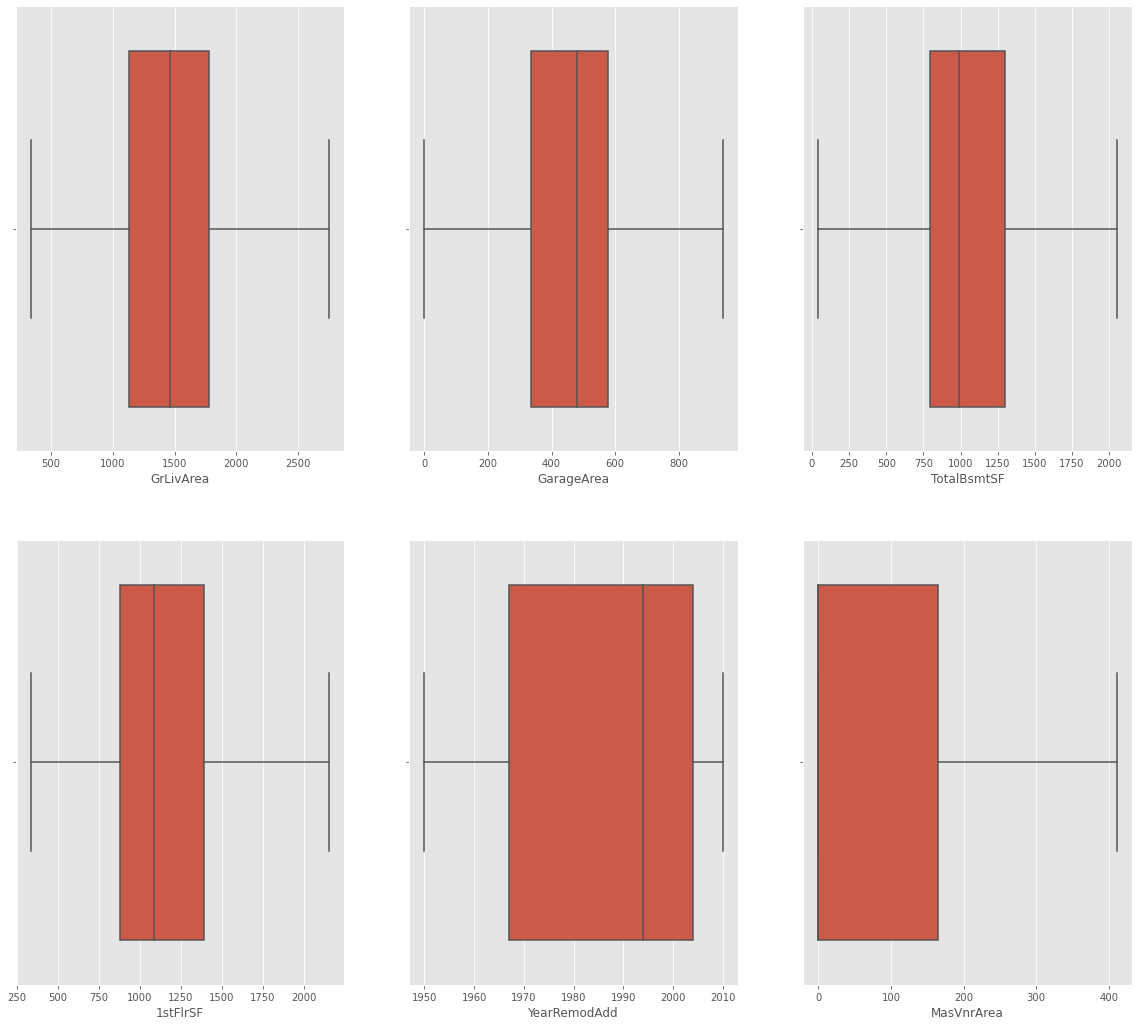

In [488]:
k=1
plt.figure(figsize=(20,18))
for col in numerical_columns:
    plt.subplot(2,3,k) # 2*3 = 6 
    sns.boxplot(x=temp_df[col])
    k+=1
plt.show()

In [489]:
# apply standard Scaler to the numerical Data 
df[numerical_columns] = StandardScaler().fit_transform(df[numerical_columns])

In [490]:
df[numerical_columns]

,GrLivArea,GarageArea,TotalBsmtSF,1stFlrSF,YearRemodAdd,MasVnrArea
0,0.370333,0.351000,-0.459303,-0.793434,0.878668,0.510015
1,-0.482512,-0.060731,0.466465,0.257140,-0.429577,-0.572835
2,0.515013,0.631726,-0.313369,-0.627826,0.830215,0.322174
3,0.383659,0.790804,-0.687324,-0.521734,-0.720298,-0.572835
4,1.299326,1.698485,0.199680,-0.045611,0.733308,1.360826
...,...,...,...,...,...,...
1455,0.250402,-0.060731,-0.238122,-0.542435,0.733308,-0.572835
1456,1.061367,0.126420,1.104925,2.355701,0.151865,0.084610
1457,1.569647,-1.033914,0.215641,0.065656,1.024029,-0.572835
1458,-0.832788,-1.090059,0.046905,-0.218982,0.539493,-0.572835


In [491]:
temp_df[categorical_columns]

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,Pave,Not Applicable,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,1,0,2,1,3,1,Gd,8,Typ,0,Not Applicable,Attchd,2003.0,RFn,2,TA,TA,Y,Not Applicable,Not Applicable,Not Applicable,2,2008,WD,Normal
1,20,RL,Pave,Not Applicable,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,TA,TA,Y,Not Applicable,Not Applicable,Not Applicable,5,2007,WD,Normal
2,60,RL,Pave,Not Applicable,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,TA,TA,Y,Not Applicable,Not Applicable,Not Applicable,9,2008,WD,Normal
3,70,RL,Pave,Not Applicable,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,TA,TA,Y,Not Applicable,Not Applicable,Not Applicable,2,2006,WD,Abnorml
4,60,RL,Pave,Not Applicable,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,TA,TA,Y,Not Applicable,Not Applicable,Not Applicable,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,Pave,Not Applicable,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,TA,TA,Y,Not Applicable,Not Applicable,Not Applicable,8,2007,WD,Normal
1456,20,RL,Pave,Not Applicable,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,Gable,CompShg,Plywood,Plywood,Stone,TA,TA,CBlock,Gd,TA,No,ALQ,Rec,GasA,TA,Y,SBrkr,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,TA,TA,Y,Not Applicable,MnPrv,Not Applicable,2,2010,WD,Normal
1457,70,RL,Pave,Not Applicable,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,Gable,CompShg,CemntBd,CmentBd,None,Ex,Gd,Stone,TA,Gd,No,GLQ,Unf,GasA,Ex,Y,SBrkr,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,TA,TA,Y,Not Applicable,GdPrv,Shed,5,2010,WD,Normal
1458,20,RL,Pave,Not Applicable,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,Hip,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,TA,TA,Mn,GLQ,Rec,GasA,Gd,Y,FuseA,1,0,1,0,2,1,Gd,5,Typ,0,Not Applicable,Attchd,1950.0,Unf,1,TA,TA,Y,Not Applicable,Not Applicable,Not Applicable,4,2010,WD,Normal


In [492]:
# Dealing with categorial Columns 

In [494]:
# If we groupby mean according to target label
#d = temp_df[['SalePrice']].groupby(temp_df[YrSold]).mean().reset_index()
#d

NameError: name 'YrSold' is not defined

In [495]:
# Create a bar plot for any categorial Columns
# See what categroal column , which all values don't effect with that much in output
def bar_plot(col):
    d = temp_df[['SalePrice']].groupby(temp_df[col]).mean().reset_index()
    sns.barplot(x=d[col], y=d['SalePrice'], order=d.sort_values(by='SalePrice', ascending=True)[col], palette='Greens')
    plt.title(col+'vs. SalePrice')

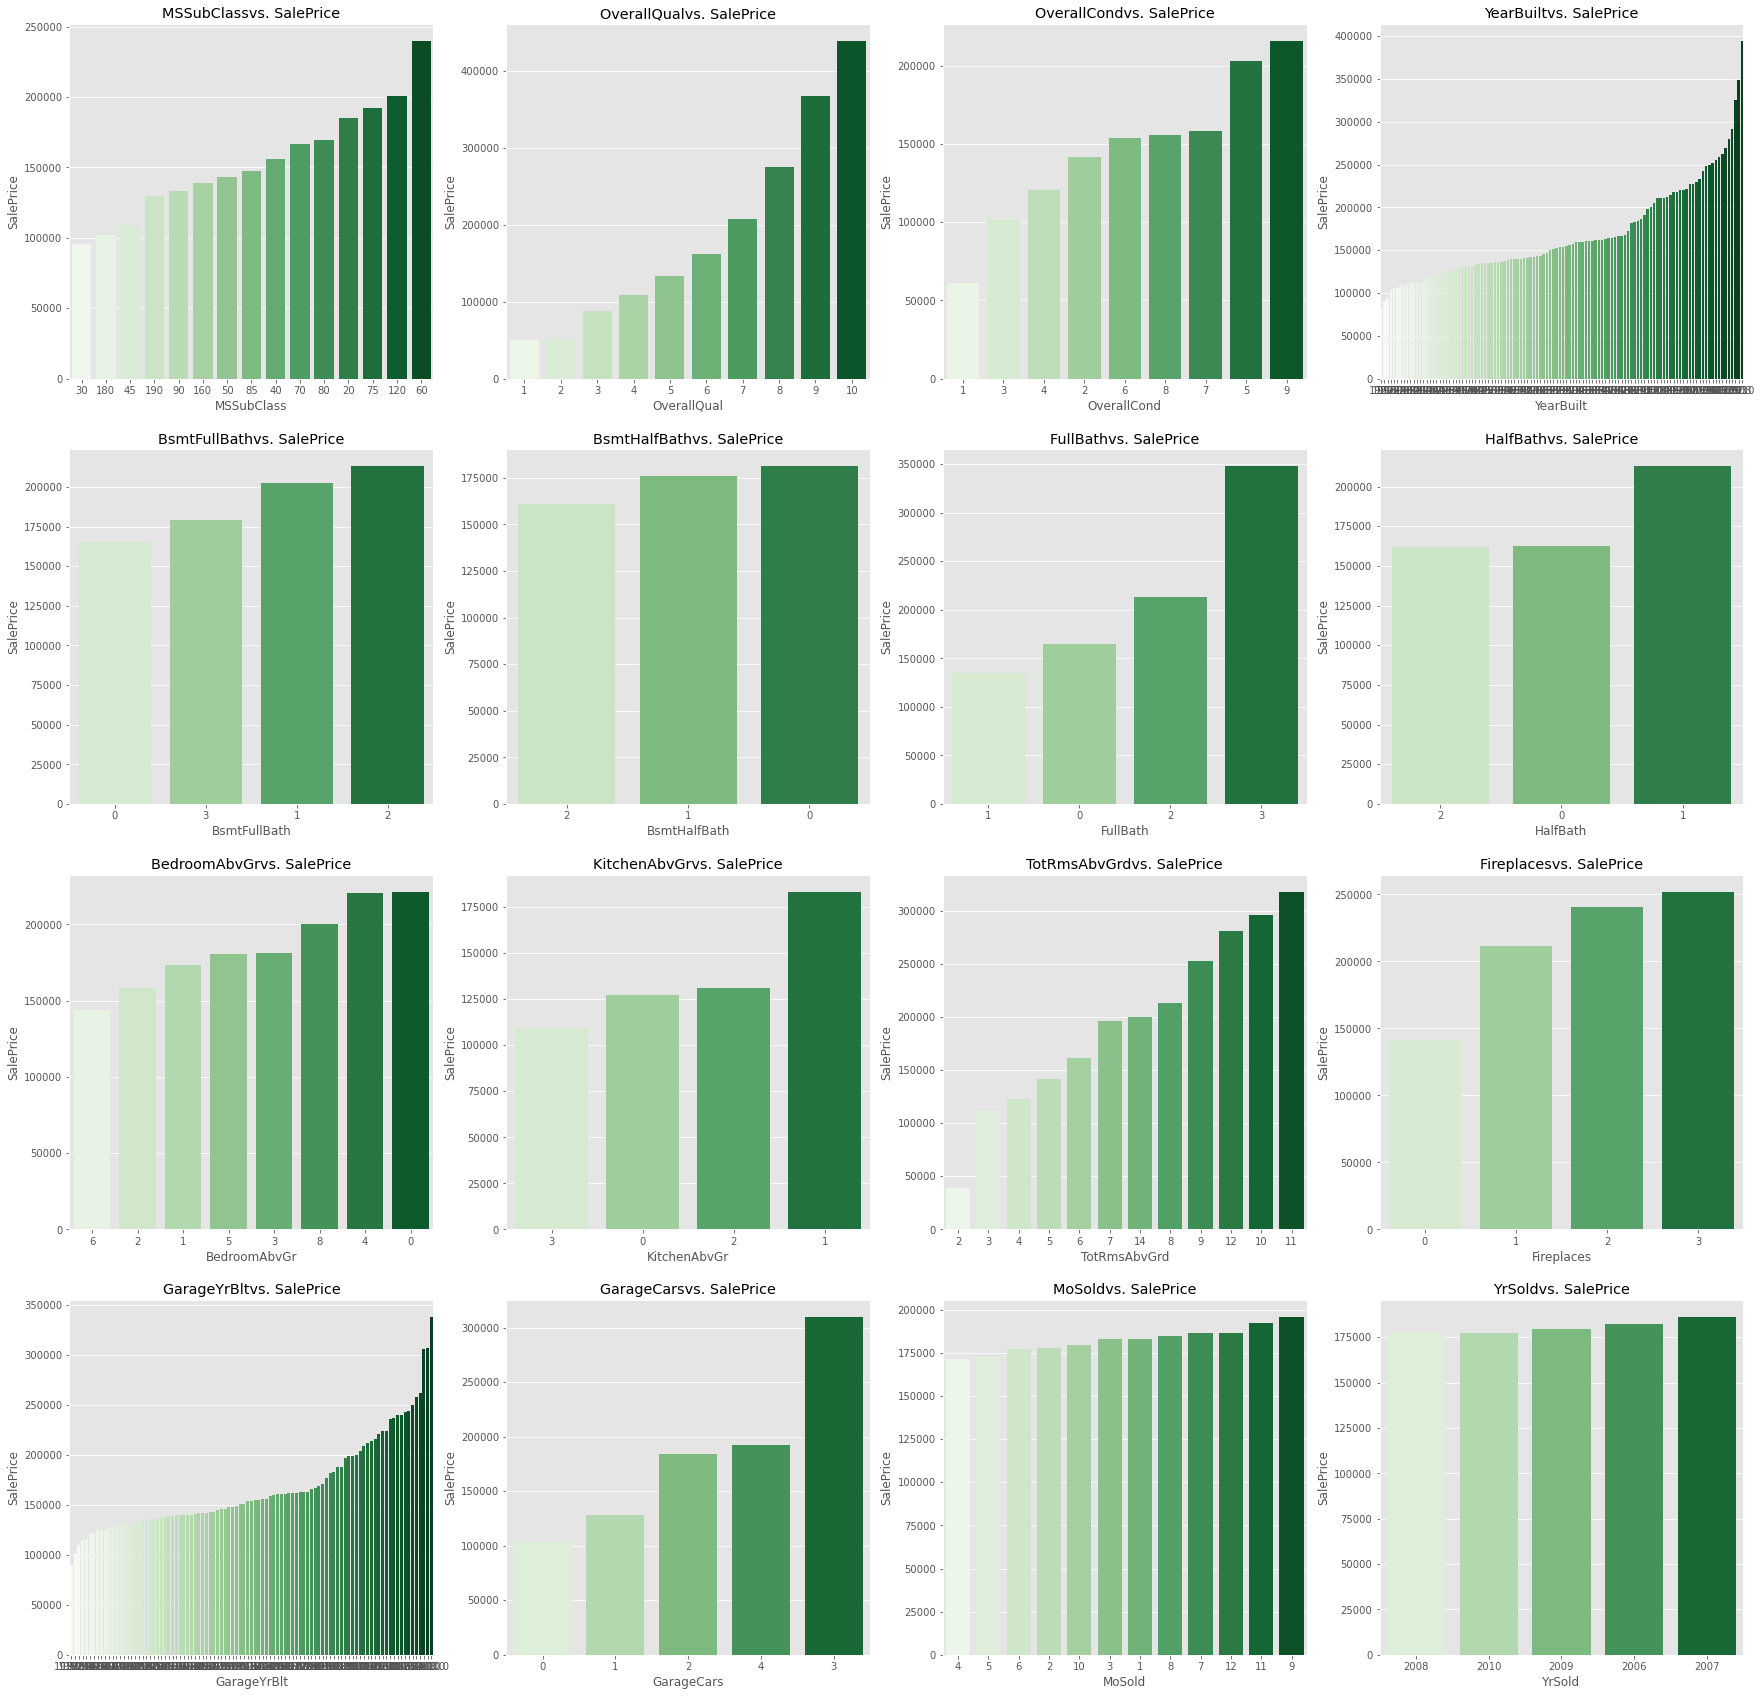

In [496]:
# Work on cateorial Column with numerical value
plt.figure(figsize=(30,30))
i=1
for col in categorial_columns_with_numerical_values:
    plt.subplot(4,4,i)
    bar_plot(col)
    i+=1
plt.show() # order is ascending according to sales price

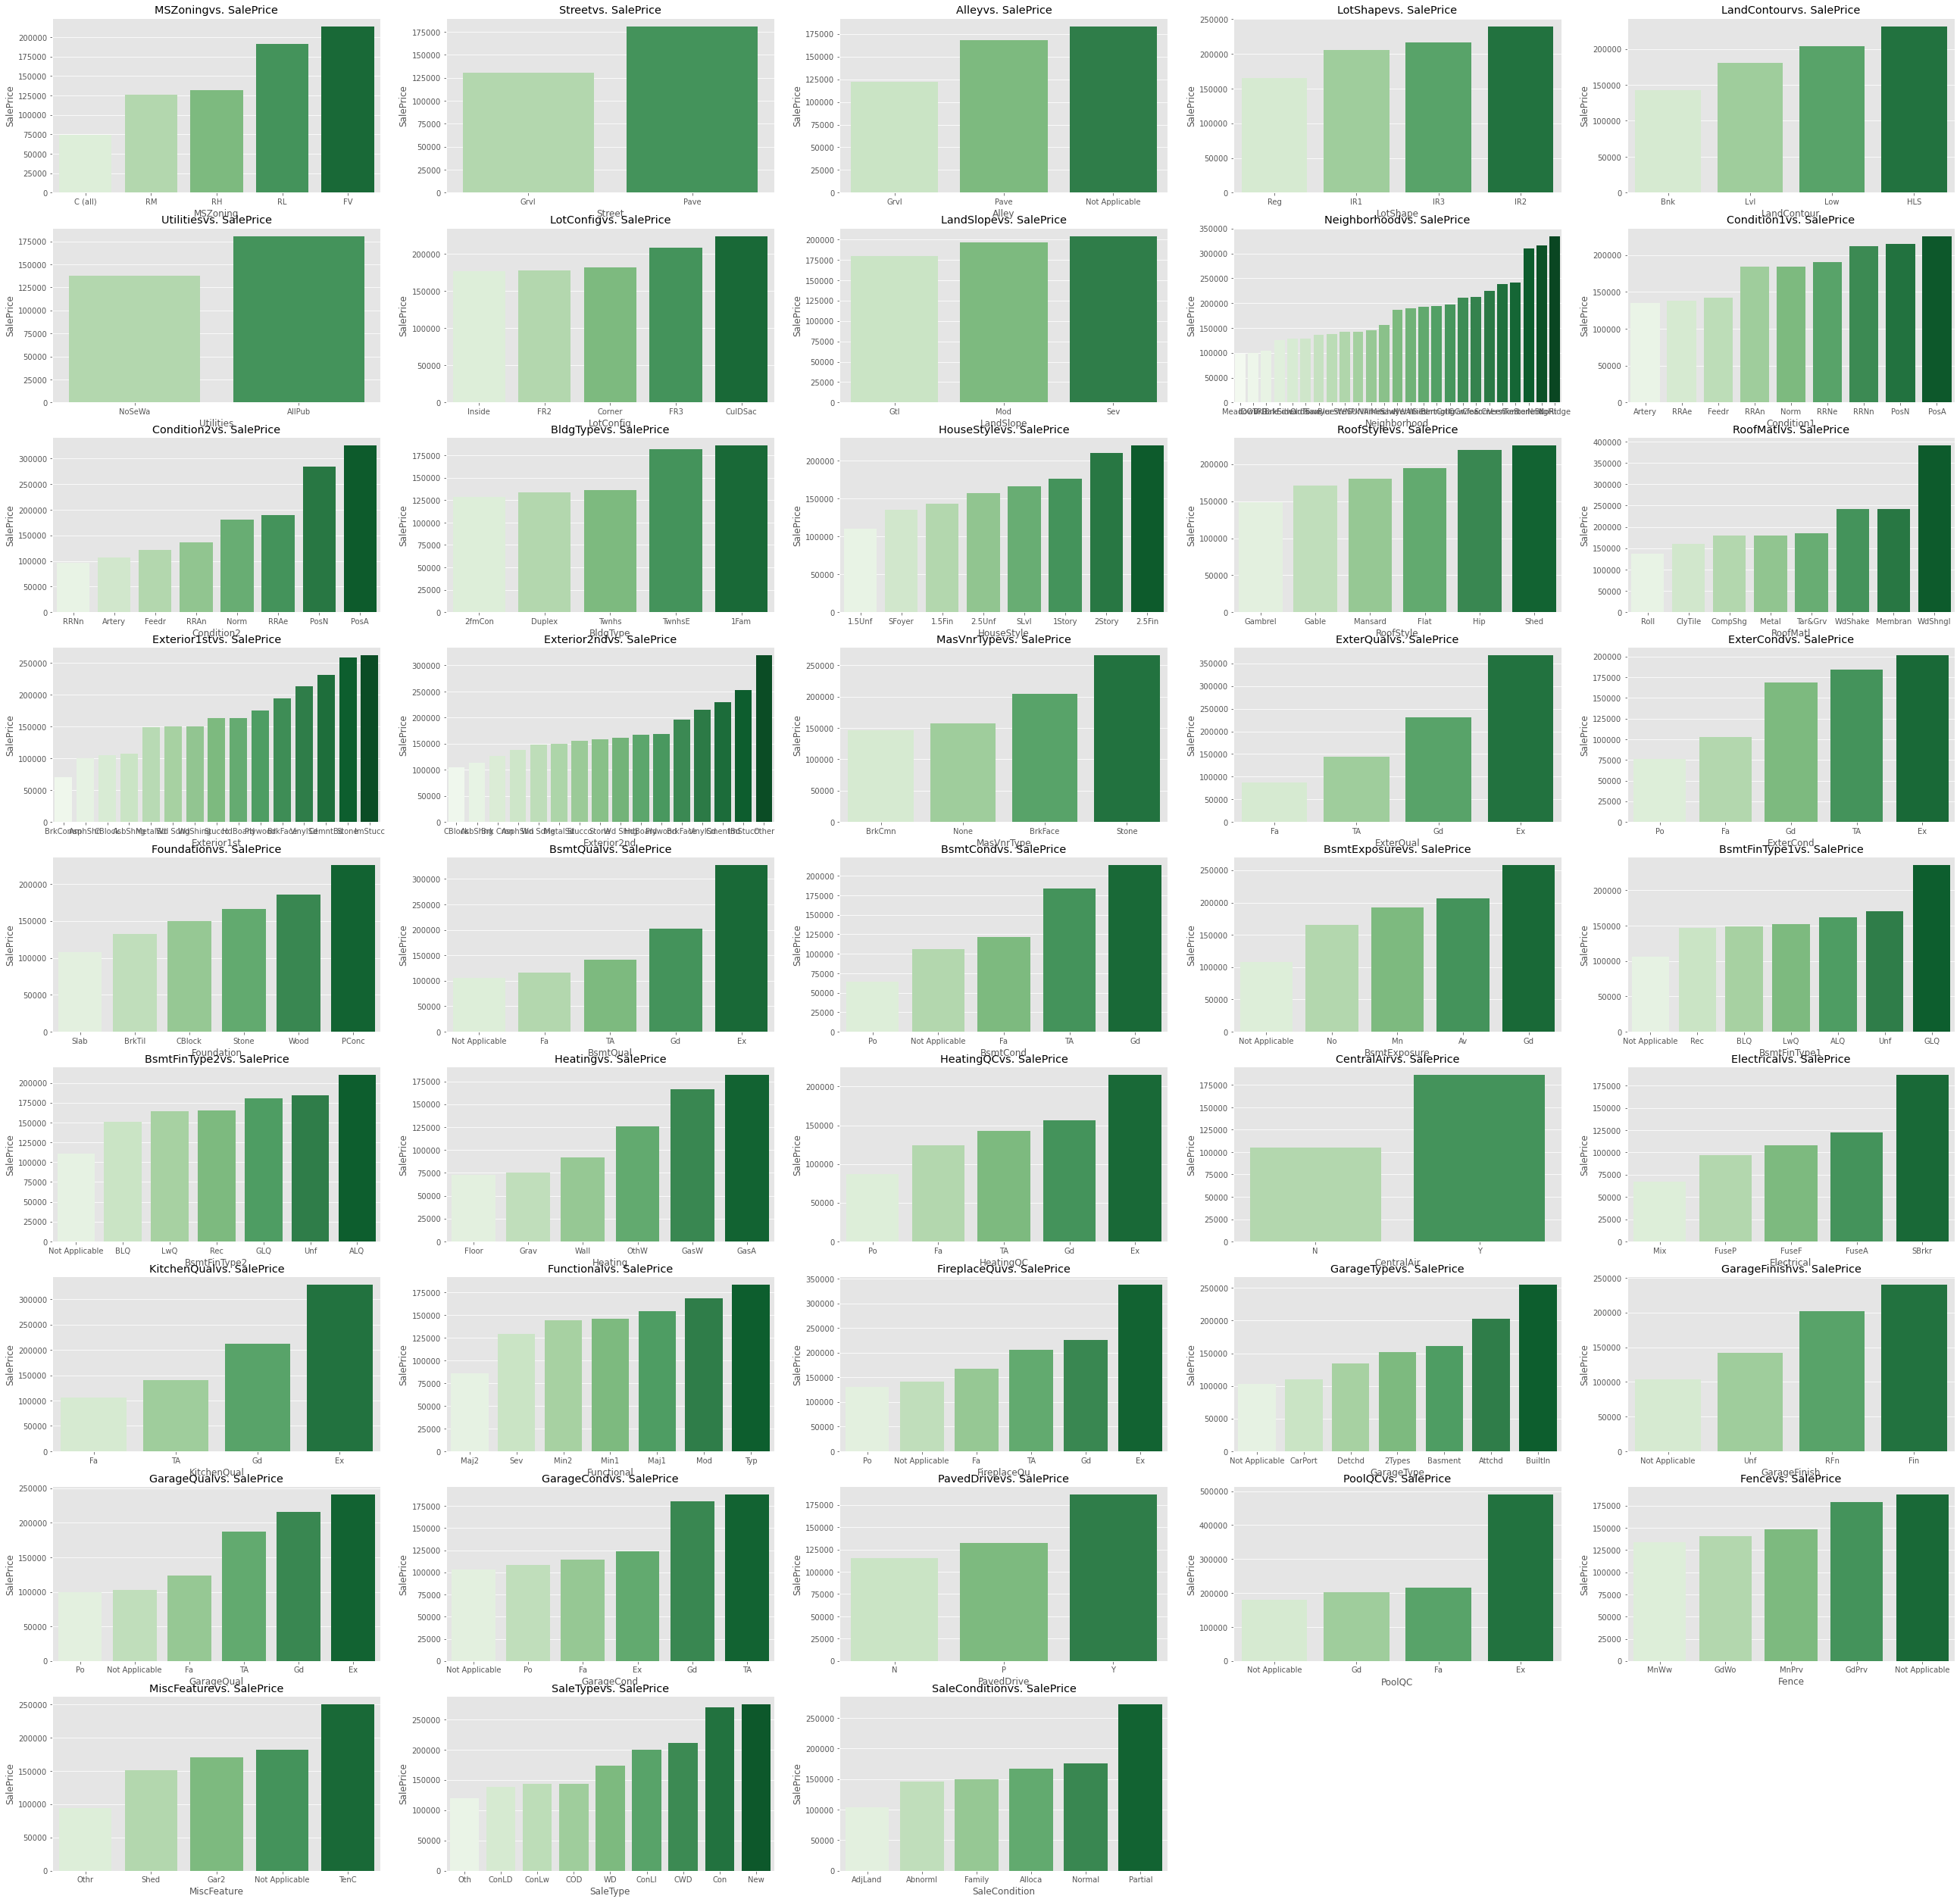

In [497]:
# Rest of categorial Columns .. Categorial columns but not numerical
plt.figure(figsize=(45,45))
i=1
for col in [ j for j in categorical_columns if j not in categorial_columns_with_numerical_values]:
    plt.subplot(9,5,i)
    bar_plot(col)
    i+=1
plt.show()


In [498]:
# columns for which we can't see much difference in the target variable, those columns can be dropped
drop= ['MoSold','BsmtHalfBath','BsmtFullBath','YrSold','LandSlope']

In [499]:
temp_df = temp_df.drop(columns=drop,axis=1) 

In [500]:
temp_df

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,SalePrice
0,60,RL,Pave,Not Applicable,Reg,Lvl,AllPub,Inside,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,856,GasA,Ex,Y,SBrkr,856.0,1710.0,2,1,3,1,Gd,8,Typ,0,Not Applicable,Attchd,2003.0,RFn,2,548.0,TA,TA,Y,Not Applicable,Not Applicable,Not Applicable,WD,Normal,208500
1,20,RL,Pave,Not Applicable,Reg,Lvl,AllPub,FR2,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,1262,GasA,Ex,Y,SBrkr,1262.0,1262.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460.0,TA,TA,Y,Not Applicable,Not Applicable,Not Applicable,WD,Normal,181500
2,60,RL,Pave,Not Applicable,IR1,Lvl,AllPub,Inside,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,920,GasA,Ex,Y,SBrkr,920.0,1786.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608.0,TA,TA,Y,Not Applicable,Not Applicable,Not Applicable,WD,Normal,223500
3,70,RL,Pave,Not Applicable,IR1,Lvl,AllPub,Corner,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,756,GasA,Gd,Y,SBrkr,961.0,1717.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642.0,TA,TA,Y,Not Applicable,Not Applicable,Not Applicable,WD,Abnorml,140000
4,60,RL,Pave,Not Applicable,IR1,Lvl,AllPub,FR2,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,1145,GasA,Ex,Y,SBrkr,1145.0,2198.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836.0,TA,TA,Y,Not Applicable,Not Applicable,Not Applicable,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,Pave,Not Applicable,Reg,Lvl,AllPub,Inside,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,Unf,953,GasA,Ex,Y,SBrkr,953.0,1647.0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460.0,TA,TA,Y,Not Applicable,Not Applicable,Not Applicable,WD,Normal,175000
1456,20,RL,Pave,Not Applicable,Reg,Lvl,AllPub,Inside,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,Rec,1542,GasA,TA,Y,SBrkr,2073.0,2073.0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500.0,TA,TA,Y,Not Applicable,MnPrv,Not Applicable,WD,Normal,210000
1457,70,RL,Pave,Not Applicable,Reg,Lvl,AllPub,Inside,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,Unf,1152,GasA,Ex,Y,SBrkr,1188.0,2340.0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252.0,TA,TA,Y,Not Applicable,GdPrv,Shed,WD,Normal,266500
1458,20,RL,Pave,Not Applicable,Reg,Lvl,AllPub,Inside,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,Rec,1078,GasA,Gd,Y,FuseA,1078.0,1078.0,1,0,2,1,Gd,5,Typ,0,Not Applicable,Attchd,1950.0,Unf,1,240.0,TA,TA,Y,Not Applicable,Not Applicable,Not Applicable,WD,Normal,142125


In [501]:
# remove from categorical columns list 
for i in drop:
    categorical_columns.remove(i)

In [502]:
len(categorical_columns)

54

In [503]:
# now we have 54 categorical columns 54 .. Label Encoding them 

for col in categorical_columns:
    temp_df[col] = LabelEncoder().fit_transform(temp_df[col])

In [504]:
temp_df

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,SalePrice
0,9,3,1,1,3,3,0,4,5,2,2,0,5,7,4,104,2003,1,1,12,13,1,196.0,2,4,2,2,4,3,2,6,856,1,0,1,4,856.0,1710.0,2,1,3,1,2,10,6,0,3,1,89,2,2,548.0,5,5,2,3,4,1,8,4,208500
1,4,3,1,1,3,3,0,2,24,1,2,0,2,6,7,77,1976,1,1,8,8,2,0.0,3,4,1,2,4,1,0,6,1262,1,0,1,4,1262.0,1262.0,2,0,3,1,3,8,6,1,5,1,62,2,2,460.0,5,5,2,3,4,1,8,4,181500
2,9,3,1,1,0,3,0,4,5,2,2,0,5,7,4,102,2002,1,1,12,13,1,162.0,2,4,2,2,4,2,2,6,920,1,0,1,4,920.0,1786.0,2,1,3,1,2,8,6,1,5,1,87,2,2,608.0,5,5,2,3,4,1,8,4,223500
3,10,3,1,1,0,3,0,0,6,2,2,0,5,7,4,19,1970,1,1,13,15,2,0.0,3,4,0,4,1,3,0,6,756,1,2,1,4,961.0,1717.0,1,0,3,1,2,9,6,1,2,5,84,3,3,642.0,5,5,2,3,4,1,8,0,140000
4,9,3,1,1,0,3,0,2,15,2,2,0,5,8,4,101,2000,1,1,12,13,1,350.0,2,4,2,2,4,0,2,6,1145,1,0,1,4,1145.0,2198.0,2,1,4,1,2,11,6,1,5,1,86,2,3,836.0,5,5,2,3,4,1,8,4,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,9,3,1,1,3,3,0,4,8,2,2,0,5,6,4,100,2000,1,1,12,13,2,0.0,3,4,2,2,4,3,6,6,953,1,0,1,4,953.0,1647.0,2,1,3,1,3,9,6,1,5,1,85,2,2,460.0,5,5,2,3,4,1,8,4,175000
1456,4,3,1,1,3,3,0,4,14,2,2,0,2,6,5,79,1988,1,1,9,10,3,119.0,3,4,1,2,4,3,0,5,1542,1,4,1,4,2073.0,2073.0,2,0,3,1,3,9,2,2,5,1,64,3,2,500.0,5,5,2,3,2,1,8,4,210000
1457,10,3,1,1,3,3,0,4,6,2,2,0,5,7,8,44,2006,1,1,5,5,2,0.0,0,2,4,4,1,3,2,6,1152,1,0,1,4,1188.0,2340.0,2,0,4,1,2,11,6,2,2,1,29,2,1,252.0,5,5,2,3,0,3,8,4,266500
1458,4,3,1,1,3,3,0,4,12,2,2,0,2,5,5,51,1996,3,1,8,8,2,0.0,3,4,1,4,4,2,2,5,1078,1,2,1,0,1078.0,1078.0,1,0,2,1,2,7,6,0,3,1,36,3,1,240.0,5,5,2,3,4,1,8,4,142125


In [505]:
# Splitting the data
X = temp_df.iloc[:,:-1]
y = temp_df.iloc[:,-1]

In [506]:
print(X.shape)
y.shape

(1460, 60)


(1460,)

In [507]:
x_train, x_valid, y_train, y_valid = train_test_split(X, y, random_state=42, test_size=0.2)

In [508]:
# creating 5 different models
RF = RandomForestRegressor().fit(x_train, y_train)
DT = DecisionTreeRegressor().fit(x_train, y_train)
GBR = GradientBoostingRegressor().fit(x_train, y_train)
LR = LinearRegression().fit(x_train, y_train)
XGB = XGBRegressor().fit(x_train, y_train)

In [509]:
# the evaluation metrics
from sklearn.metrics import mean_squared_log_error

models = [LR, DT, RF, GBR, XGB]
LMSE = [mean_squared_log_error(y_valid,mod.predict(x_valid))**0.5 for mod in models]
RMSE = [mean_squared_error(y_valid, mod.predict(x_valid))**0.5 for mod in models]
R2_Score = [r2_score(y_valid, mod.predict(x_valid)) for mod in models]
MAPE = [mean_absolute_percentage_error(y_valid, mod.predict(x_valid)) for mod in models]

In [510]:
LMSE

[0.18130727107451652,
 0.224830052810552,
 0.15728806563294914,
 0.14608105907532493,
 0.14759138825715523]

In [511]:
Models = ['Linear Regression','Decision Tree','Random Forest','Gradient Boosting','XgBoost']
evaluation = pd.DataFrame({'Models':Models,'LMSE':LMSE,'RMSE':RMSE, 'R2_Score':R2_Score,'MAPE':MAPE})


In [512]:
evaluation

,Models,LMSE,RMSE,R2_Score,MAPE
0,Linear Regression,0.181307,35423.359109,0.836407,0.131369
1,Decision Tree,0.224830,49071.198223,0.686065,0.158725
2,Random Forest,0.157288,30167.015920,0.881355,0.109436
3,Gradient Boosting,0.146081,29290.712069,0.888147,0.105259
4,XgBoost,0.147591,28573.833552,0.893556,0.105668


In [ ]:
# Work iin Test set Data

In [513]:
# loading the data
test = pd.read_csv("test.csv")

In [514]:
# saving this variable
id = test['Id']

In [515]:
Id.shape,test.shape

((1459,), (1459, 80))

In [516]:
# changing data types .. Because that's treat as sring value
for i in categorial_columns_with_numerical_values:
    test[i] = test[i].astype(str)

In [517]:
test = test.drop([col for col in test if col not in temp_df.columns], axis=1)

In [518]:
# dealing with null value in test set
nulls = test.isnull().sum()[test.isnull().sum().values>0].index
other_cols = [col for col in nulls if col not in col_with_NA_as_category]

In [519]:
other_cols

['MSZoning',
 'Utilities',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'TotalBsmtSF',
 'KitchenQual',
 'Functional',
 'GarageArea',
 'SaleType']

In [520]:
test[['MasVnrArea']] = pd.DataFrame(SimpleImputer(strategy='mean').fit_transform(test[['MasVnrArea']]))
test[['GarageArea']] = pd.DataFrame(SimpleImputer(strategy='mean').fit_transform(test[['GarageArea']]))
test[['TotalBsmtSF']] = pd.DataFrame(SimpleImputer(strategy='mean').fit_transform(test[['TotalBsmtSF']]))



In [521]:
for col in other_cols:
    if col not in ['MasVnrArea','GarageArea','TotalBsmtSF']:
        test[[col]] = pd.DataFrame(SimpleImputer(strategy='most_frequent').fit_transform(test[[col]]))

In [522]:
for col in col_with_NA_as_category:
    test[col].fillna('Not Applicable', inplace=True)

In [523]:
test.isnull().sum()[test.isnull().sum().values>0]

Series([], dtype: int64)

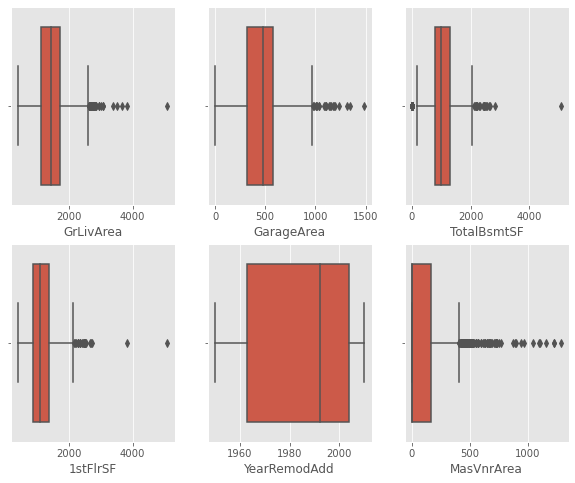

In [524]:
# outliers check
k=1
plt.figure(figsize=(10,8))
for col in numerical_columns:
    plt.subplot(2,3,k)
    sns.boxplot(x=test[col])
    k+=1
plt.show()

In [525]:
for col in numerical_columns:
    if col!='YearRemodAdd':
        remove_outlier(test[col])

In [526]:
# normalisation
test[numerical_columns] = StandardScaler().fit_transform(test[numerical_columns])

In [527]:
# Categorical columns which we previously dropped .. will be already dropped here 
# LabelEncoding
for col in categorical_columns:
    test[col] = LabelEncoder().fit_transform(test[col])

In [528]:
test.shape

(1459, 60)

In [529]:
pred = XGB.predict(test)

In [530]:
submission = pd.DataFrame({'Id':id.values,'SalePrice':pred})

In [531]:
submission.head(10)

,Id,SalePrice
0,1461,105979.085938
1,1462,102643.101562
2,1463,88401.070312
3,1464,99359.859375
4,1465,128317.250000
5,1466,80173.976562
6,1467,86610.750000
7,1468,79067.929688
8,1469,105467.867188
9,1470,78286.851562


In [532]:
submission.to_csv('submission.csv',index=False)

In [ ]:
# NN_model = Sequential()

# # The Input Layer :
# NN_model.add(Dense(128, kernel_initializer='normal',input_dim = 60, activation='relu'))

# # The Hidden Layers :
# NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
# NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
# NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# # The Output Layer :
# NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# # Compile the network :
# NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
# NN_model.summary()

In [ ]:
# history=NN_model.fit(x_train, y_train, validation_data=(x_valid, y_valid), epochs=100, batch_size=32)


In [ ]:
# # Model Losss
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.title('Model Loss')
# plt.ylabel('loss')
# plt.xlabel('epoch')
# plt.legend(['train', 'Valid'])
# plt.show()

In [ ]:
# # LMSE for Train
# mean_squared_log_error(y_train,NN_model.predict(x_train))**0.5

In [ ]:
# #LMSE for Test
# mean_squared_log_error(y_valid,NN_model.predict(x_valid))**0.5

In [ ]:
# pred = NN_model.predict(test)
# pred = pred.reshape((1459,))


In [ ]:
#submission = pd.DataFrame({'Id':id.values,'SalePrice':pred})

In [ ]:
#submission.head()

In [ ]:
#submission.to_csv('submission.csv',index=False)

In [ ]:
# #pred = NN_model.predict(test)
# #pred = pred.reshape((1459,))

# # Neural Network 
# from keras.models import Sequential
# from keras.layers import Dense
# from keras.layers import Dropout
# from keras import regularizers
# NN_model = Sequential()

# NN_model.add(Dense(128, input_dim=60, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))

# NN_model.add(Dense(256, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))
# NN_model.add(Dropout(0.25))
# NN_model.add(Dense(512, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))

# NN_model.add(Dense(1024, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))
# NN_model.add(Dropout(0.25))
# NN_model.add(Dense(2048, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))

# NN_model.add(Dense(1024, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))
# NN_model.add(Dropout(0.25))
# NN_model.add(Dense(256, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))

# NN_model.add(Dense(128, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))
# NN_model.add(Dropout(0.25))
# NN_model.add(Dense(64, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))

# NN_model.add(Dense(32, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))
# NN_model.add(Dropout(0.25))
# NN_model.add(Dense(8, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))
# NN_model.add(Dropout(0.25))


# NN_model.add(Dense(1, kernel_initializer='normal'))

# NN_model.summary()

# NN_model.compile(optimizer='adam', # optimization algorithm 
#               loss='mean_absolute_error',metrics=['mean_absolute_error'])
# history=NN_model.fit(x_train, y_train, validation_data=(x_valid, y_valid), epochs=100, batch_size=32)

# # Model Losss
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.title('Model Loss')
# plt.ylabel('loss')
# plt.xlabel('epoch')
# plt.legend(['train', 'Valid'])
# plt.show()

# # LMSE for Train
# mean_squared_log_error(y_train,NN_model.predict(x_train))**0.5

# #LMSE for Test
# mean_squared_log_error(y_valid,NN_model.predict(x_valid))**0.5